In [1]:
#Get dependencies
import csv
import pandas as pd
import numpy as np
import folium
from folium import plugins
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
from branca.colormap import linear
import matplotlib.patches as mpatches

%matplotlib inline


#Read dataset from csv into DataFrame
dataPath='data/FY16_College_Data.csv'
data = pd.read_csv(dataPath, low_memory=False)
df = pd.DataFrame(data)



In [2]:
#Create DataFrame for Acceptance records
accept_df = df[['UNITID','INSTNM','CITY','STABBR', 'REGION', 'LATITUDE',
'LONGITUDE', 'ADM_RATE','SAT_AVG', 'ACTCMMID']]
print(len(accept_df))
accept_df.head()

2109


,UNITID,INSTNM,CITY,STABBR,REGION,LATITUDE,LONGITUDE,ADM_RATE,SAT_AVG,ACTCMMID
0,100654,Alabama A & M University,Normal,AL,5,34.783368,-86.568502,0.6538,850.0,18.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,5,33.502230,-86.809170,0.6043,1147.0,25.0
2,100690,Amridge University,Montgomery,AL,5,32.362609,-86.174010,NaN,NaN,NaN
3,100706,University of Alabama in Huntsville,Huntsville,AL,5,34.722818,-86.638420,0.8120,1221.0,27.0
4,100724,Alabama State University,Montgomery,AL,5,32.364317,-86.295677,0.4639,844.0,18.0


Colleges acceptance rate less than 10 % by SAT or ACT score

In [3]:
rate_accept_top10prc = accept_df[(accept_df['ADM_RATE'] > 0) & (accept_df['ADM_RATE'] < 0.1)]
rate_accept_top10prc = rate_accept_top10prc.dropna(subset=['SAT_AVG'])
print(len(rate_accept_top10prc))
rate_accept_top10prc

9


,UNITID,INSTNM,CITY,STABBR,REGION,LATITUDE,LONGITUDE,ADM_RATE,SAT_AVG,ACTCMMID
74,110404,California Institute of Technology,Pasadena,CA,8,34.139275,-118.125740,0.0881,1544.0,35.0
221,130794,Yale University,New Haven,CT,1,41.311158,-72.926688,0.0673,1498.0,33.0
348,144050,University of Chicago,Chicago,IL,3,41.789170,-87.601196,0.0838,1506.0,34.0
645,166027,Harvard University,Cambridge,MA,1,42.374429,-71.118177,0.0558,1497.0,34.0
656,166683,Massachusetts Institute of Technology,Cambridge,MA,1,42.360095,-71.092115,0.0830,1507.0,34.0
904,186131,Princeton University,Princeton,NJ,2,40.348530,-74.663603,0.0714,1490.0,34.0
943,190150,Columbia University in the City of New York,New York,NY,2,40.808286,-73.961885,0.0661,1473.0,33.0
1391,217156,Brown University,Providence,RI,1,41.827605,-71.404467,0.0949,1457.0,33.0
1746,243744,Stanford University,Stanford,CA,8,37.426967,-122.168826,0.0504,1479.0,33.0


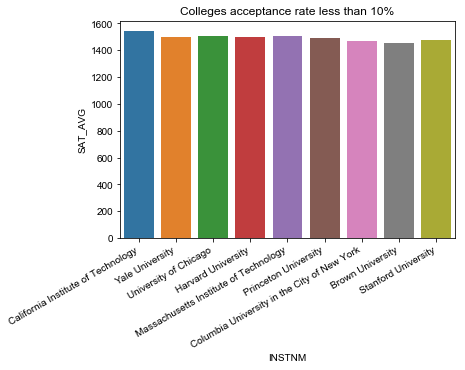

In [4]:
#Plot
sn_plot_acceptance_sat_avg = sns.barplot(x="INSTNM", y="SAT_AVG", data=rate_accept_top10prc)
sn_plot_acceptance_sat_avg.set_xticklabels(sn_plot_acceptance_sat_avg.get_xticklabels(),rotation=30,ha='right')
sns.set(rc={'figure.figsize':(10,6)})
plt.title("Colleges acceptance rate less than 10%")
plt.savefig("TopTenByAccRateAndSAT.png")
plt.show()

Colleges acceptance rate less than 25% by SAT or ACT score

In [5]:
rate_accept_25prc = accept_df[(accept_df['ADM_RATE'] > 0) & (accept_df['ADM_RATE'] < 0.25)]
len(rate_accept_25prc)

68

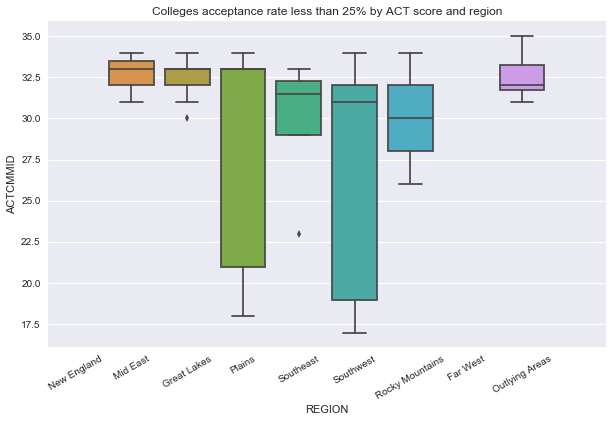

In [6]:
#Plot

xticks = ['New England', 'Mid East','Great Lakes','Plains', 'Southeast','Southwest','Rocky Mountains','Far West','Outlying Areas']
sn_acceptance_rate_sat_25prc = sns.boxplot(x="REGION", y="ACTCMMID", data=rate_accept_25prc)
sn_acceptance_rate_sat_25prc.set_xticklabels(xticks,rotation=30)
sns.set(rc={'figure.figsize':(10, 8)})
plt.title("Colleges acceptance rate less than 25% by ACT score and region")
plt.savefig("AcceptanceRateLess25%ByRegion.png")
plt.show()

Colleges acceptance rate less than 50% by SAT or ACT score

In [7]:
sn_rate_accept_50prc = accept_df[(accept_df['ADM_RATE'] > 0) & (accept_df['ADM_RATE'] < 0.5)]
len(sn_rate_accept_50prc)

325

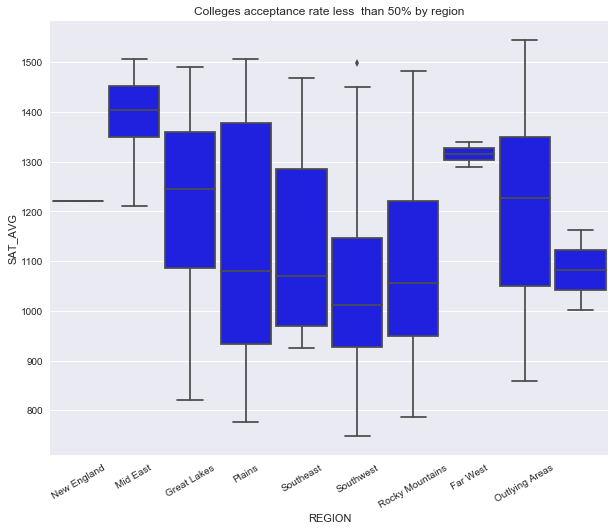

In [8]:
sn_plot_acceptance_sat_avg = sns.boxplot(x="REGION", y="SAT_AVG", width=0.9, data=sn_rate_accept_50prc, color="blue")
sns.set(rc={'figure.figsize':(10,8)})
sn_plot_acceptance_sat_avg.set_xticklabels(xticks,rotation=30)
plt.title("Colleges acceptance rate less  than 50% by region")
plt.show()

Colleges acceptance rate less than 50% by State

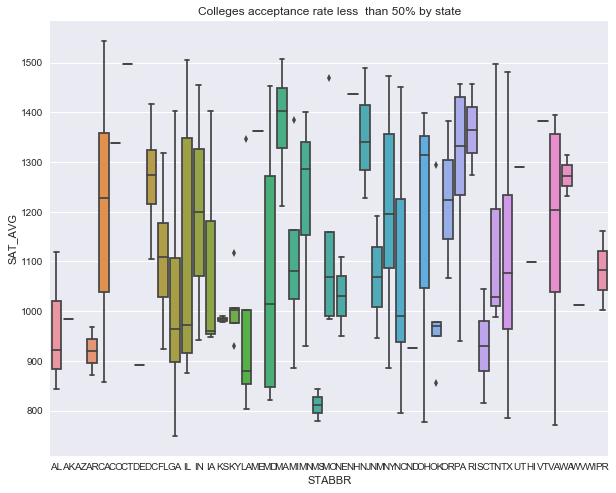

In [9]:
sn_acceptance_rate_sat = sns.boxplot(x="STABBR", y="SAT_AVG", data=sn_rate_accept_50prc)
sns.set(rc={'figure.figsize':(23,9)})
plt.title("Colleges acceptance rate less  than 50% by state")
plt.savefig("AcceptanceRateLess50%ByStates.png")
plt.show()

Graduation Data Analysis

Distribution of Institutions across the Nation

In [10]:
#Plot distribution of Institutions across the Nation
list_data=df[['LATITUDE','LONGITUDE','C150_4_WHITE']]
list_data=list_data.dropna()
a=list_data.values.tolist()
m=folium.Map([41.8781, -87.6298], zoom_start=1)
HeatMap(a).add_to(m)
m


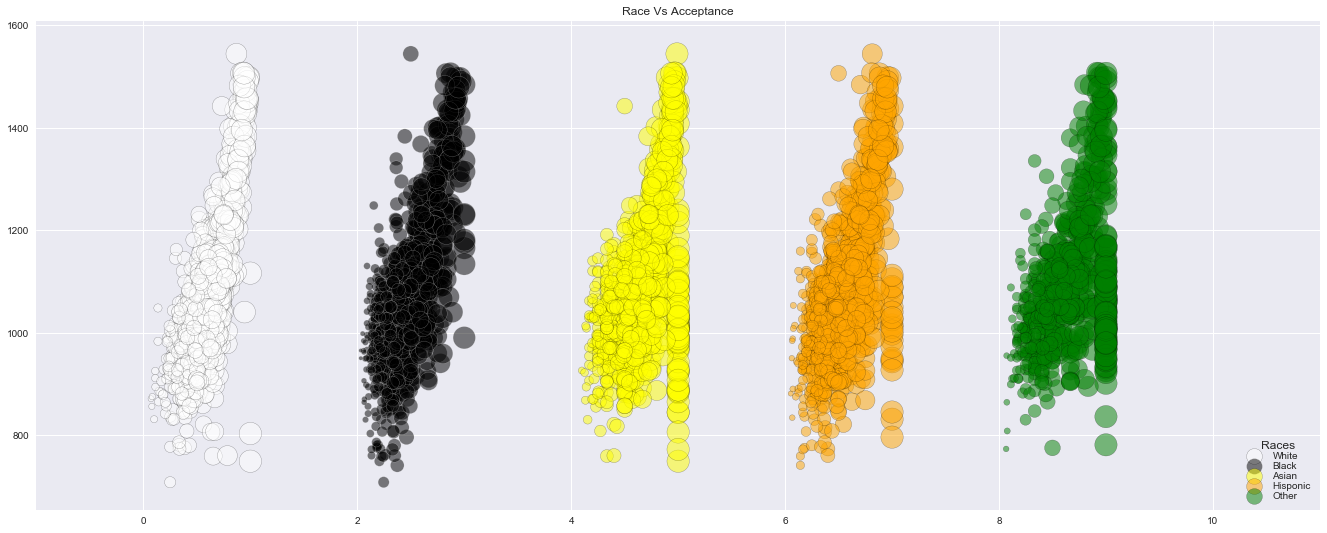

In [11]:
#Scatter plot Race Vs Acceptance

plt.scatter(df['C150_4_WHITE'], df['SAT_AVG'], s=df['C150_4_WHITE']*500, c='w', edgecolors='black', alpha=.5, label='White')
plt.scatter(df['C150_4_BLACK']+2, df['SAT_AVG'], s=df['C150_4_BLACK']*500, c='black', edgecolors='white', alpha=.5, label='Black')
plt.scatter(df['C150_4_ASIAN']+4, df['SAT_AVG'], s=df['C150_4_ASIAN']*500,  c='yellow', edgecolors='black', alpha=.5, label='Asian')
plt.scatter(df['C150_4_HISP']+6, df['SAT_AVG'], s=df['C150_4_HISP']*500, c='orange', edgecolors='black', alpha=.5, label='Hisponic')
plt.scatter(df['C150_4_2MOR']+8, df['SAT_AVG'], s=df['C150_4_2MOR']*500, c='green', edgecolors='black', alpha=.5, label='Other')

plt.legend(fontsize='small', loc="lower right",
           title="Races", 
            labelspacing=0.1,
           mode="Expanded")
plt.xlim(-1, 11)
plt.title('Race Vs Acceptance')
plt.savefig('./RaceVsAcceptance')

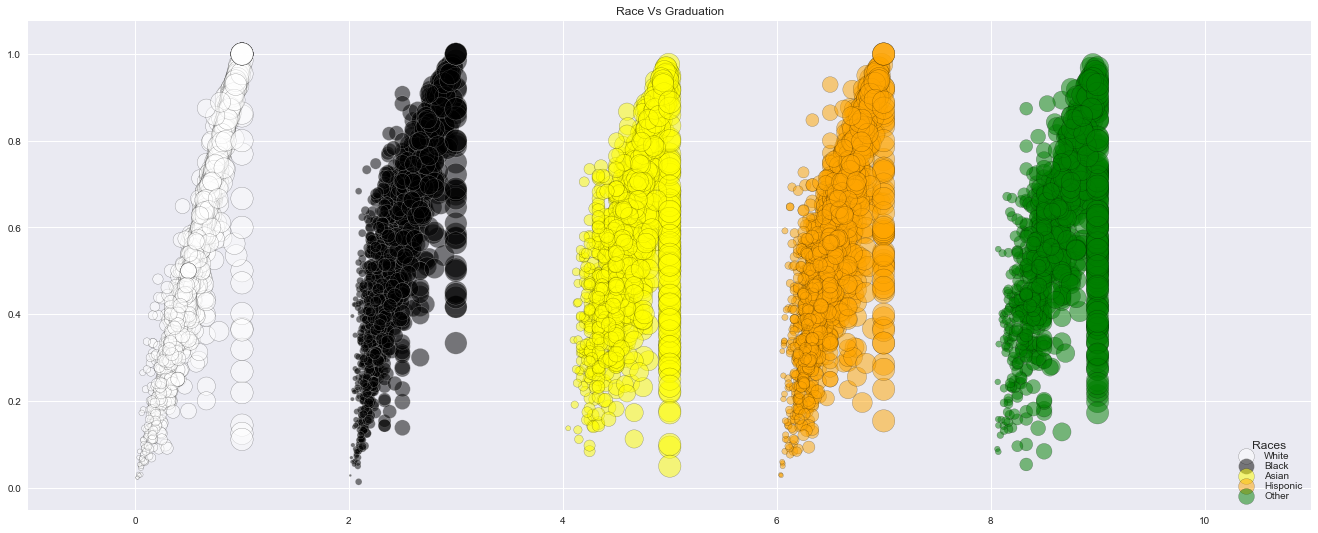

In [12]:
#Scatter plot Race Vs Graduation

plt.scatter(df['C150_4_WHITE'], df['C150_4'], s=df['C150_4_WHITE']*500, c='w', edgecolors='black', alpha=.5, label='White')
plt.scatter(df['C150_4_BLACK']+2, df['C150_4'], s=df['C150_4_BLACK']*500, c='black', edgecolors='white', alpha=.5, label='Black')
plt.scatter(df['C150_4_ASIAN']+4, df['C150_4'], s=df['C150_4_ASIAN']*500,  c='yellow', edgecolors='black', alpha=.5, label='Asian')
plt.scatter(df['C150_4_HISP']+6, df['C150_4'], s=df['C150_4_HISP']*500, c='orange', edgecolors='black', alpha=.5, label='Hisponic')
plt.scatter(df['C150_4_2MOR']+8, df['C150_4'], s=df['C150_4_2MOR']*500, c='green', edgecolors='black', alpha=.5, label='Other')

plt.legend(fontsize='small', loc="lower right",
           title="Races", 
            labelspacing=0.1,
           mode="Expanded")
plt.xlim(-1, 11)
plt.title("Race Vs Graduation")
plt.savefig('./RaceVsGraduation')

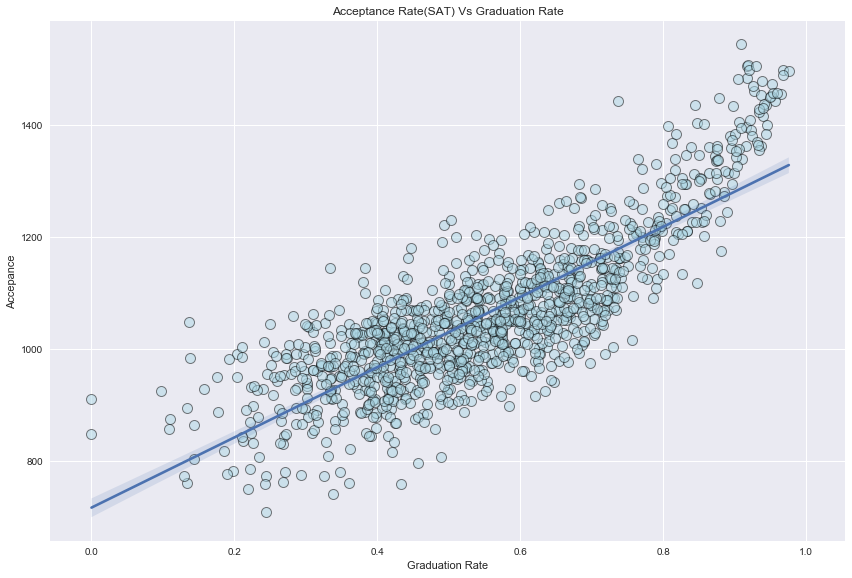

In [13]:
#Scatter plot Acceptance Rate (SAT) Vs Graduation Rate

sns.set(color_codes=True)
sns.lmplot(x='C150_4', y='SAT_AVG', data=df,size=8, legend=True,
           legend_out=True,truncate=True, aspect=1.5,
           scatter_kws = {"color":"lightblue",
                          'alpha':0.5, "s":100,'linewidths':1
                          ,'edgecolor':'black', 'marker':'o'})
plt.xlabel('Graduation Rate')
plt.ylabel('Accepance')
plt.title('Acceptance Rate(SAT) Vs Graduation Rate')
plt.savefig('./AcceptVsGrad')

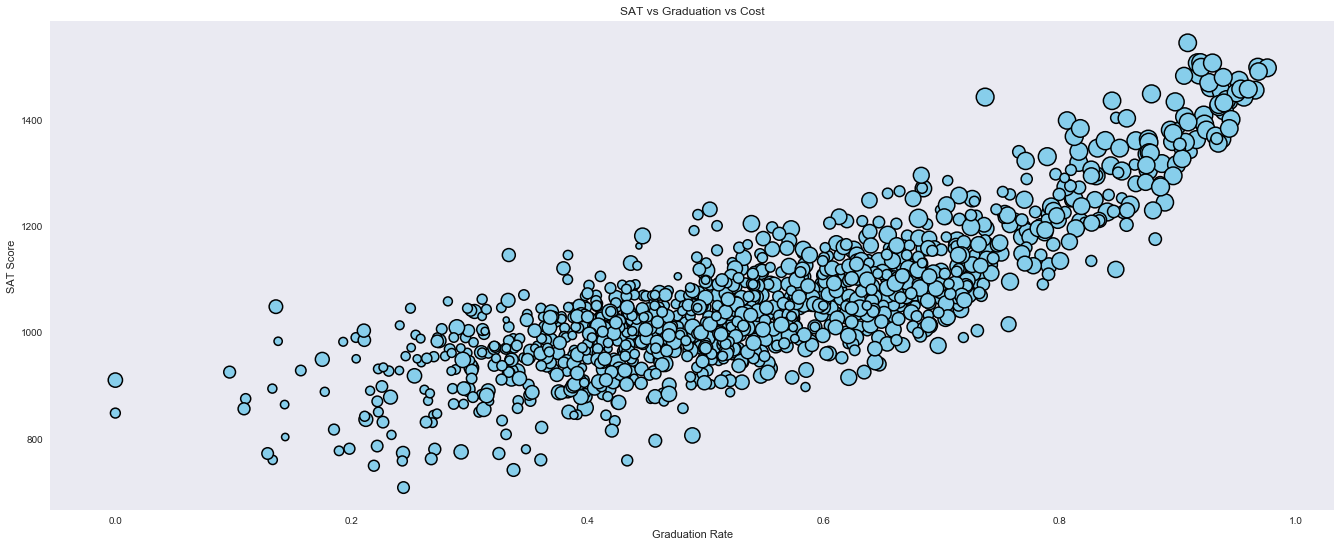

In [14]:
#Scatter plot Acceptance Rate (SAT) Vs Graduation Rate Vs Cost

plt.scatter(df['C150_4'],df['SAT_AVG'], s=df['COSTT4_A']/200, c='skyblue', edgecolors='black', linewidths=1.5)
plt.grid()
plt.title("SAT vs Graduation vs Cost")
plt.xlabel("Graduation Rate")
plt.ylabel("SAT Score")
plt.savefig('./SATvsGradvsCost')

Cost Analysis

In [15]:

#Remove any NULL values for cost
bachelors_df = df[np.isfinite(df['COSTT4_A'])]
bachelors_df.head()

,Unnamed: 0,UNITID,INSTNM,CITY,STABBR,REGION,LATITUDE,LONGITUDE,PREDDEG,COSTT4_A,...,C150_4_HISP,C150_4_ASIAN,C150_4_AIAN,C150_4_NHPI,C150_4_2MOR,C150_4_NRA,C150_4_UNKN,ADM_RATE,SAT_AVG,ACTCMMID
0,0,100654,Alabama A & M University,Normal,AL,5,34.783368,-86.568502,3,20809.0,...,0.0000,0.0000,0.3333,NaN,NaN,NaN,0.0000,0.6538,850.0,18.0
1,1,100663,University of Alabama at Birmingham,Birmingham,AL,5,33.502230,-86.809170,3,22232.0,...,0.5946,0.7722,0.5000,1.0,0.7222,0.6875,0.4146,0.6043,1147.0,25.0
2,2,100690,Amridge University,Montgomery,AL,5,32.362609,-86.174010,3,12133.0,...,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,100706,University of Alabama in Huntsville,Huntsville,AL,5,34.722818,-86.638420,3,20999.0,...,0.2800,0.5333,0.3636,1.0,0.4375,0.6471,0.7500,0.8120,1221.0,27.0
4,4,100724,Alabama State University,Montgomery,AL,5,32.364317,-86.295677,3,18100.0,...,NaN,1.0000,1.0000,0.0,NaN,0.0000,0.2667,0.4639,844.0,18.0


In [16]:
#Find the median latitude and logitude
middle_lat = bachelors_df['LATITUDE'].median()
middle_lon = bachelors_df['LONGITUDE'].median()

#Create a color scale for cost
colormap = linear.YlOrRd.scale(
    bachelors_df['COSTT4_A'].min(),
    bachelors_df['COSTT4_A'].max())

colormap

In [17]:
#Plot instititions on map by cost 
cost_map = folium.Map(location=[middle_lat, middle_lon],
                          zoom_start=4)

# mark each institution as a point
for index, row in bachelors_df.iterrows():
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']],
                        radius=2,
                        fill=True,
                        fill_color=colormap(row['COSTT4_A']),
                        color=colormap(row['COSTT4_A']),
                        fill_opacity=0.5
                        ).add_to(cost_map)


legend_html = '''<div style="position: fixed; 
     bottom: 200px; left: 850px; width: 500px; height: 100px; 
     border:0px solid grey; z-index:9999; font-size:12px;">
     &nbsp; Cost of Tuition <br/>
         <img src="images/CostOfTuition.png"></img>
      </div>
     '''

cost_map.get_root().html.add_child(folium.Element(legend_html))
    
cost_map.save('Colleges_Cost_Distribution.html')

cost_map

In [19]:


#Get list of State Names and Abbreviations
states_df = pd.read_csv('data/list-states-us.csv')
states_df.columns = ['id','name', 'State']
states_df.head()


,id,name,State
0,2,Alaska,AK
1,3,Arizona,AZ
2,4,Arkansas,AR
3,5,California,CA
4,6,Colorado,CO


In [20]:
#Get cost data by State
cost_state_grouped = bachelors_df.groupby('STABBR')

#Get all unique states
states = bachelors_df['STABBR'].unique()

#Combine State Abbreviation, State Name and Average Cost into one DataFrame
cost_states_df = pd.DataFrame(states)
cost_states_df.columns = ['State']
cost_states_df['Average Cost'] = ''

#Loop through states and find average cost
for index, row in cost_states_df.iterrows():
    cost_df = cost_state_grouped.get_group(row['State'])
    average = np.mean(cost_df['COSTT4_A'])
    cost_states_df.at[index,'Average Cost'] = average
    
cost_states_df = pd.merge(cost_states_df, states_df, on='State', how='inner')
    
len(cost_states_df)

49

In [21]:
#Plot average costs by State
average_map = folium.Map(location=[43, -100],
                          zoom_start=4)

average_map.choropleth(
    geo_data=open('data/us-states.json').read(),
    data=cost_states_df,
    columns=['name', 'Average Cost'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    legend_name='Average Cost of Tuition'
    )

average_map.save('Average_Cost_Distribution.html')

average_map

Salary Data Analysis

In [22]:
#Read CSV File Salary by School Name and convert to Dataframe
salary_by_inst = pd.read_csv('data/salaries-by-college-type.csv')
salary_by_inst.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [23]:


#Convert String Values to Numeric
salary_list = ['Starting Median Salary', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary',
              'Mid-Career 25th Percentile Salary','Mid-Career 75th Percentile Salary','Mid-Career 90th Percentile Salary']
for x in salary_list:
    salary_by_inst[x] = salary_by_inst[x].str.replace("$","")
    salary_by_inst[x] = salary_by_inst[x].str.replace(",","")
    salary_by_inst[x] = pd.to_numeric(salary_by_inst[x])

salary_by_inst.head()


,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN


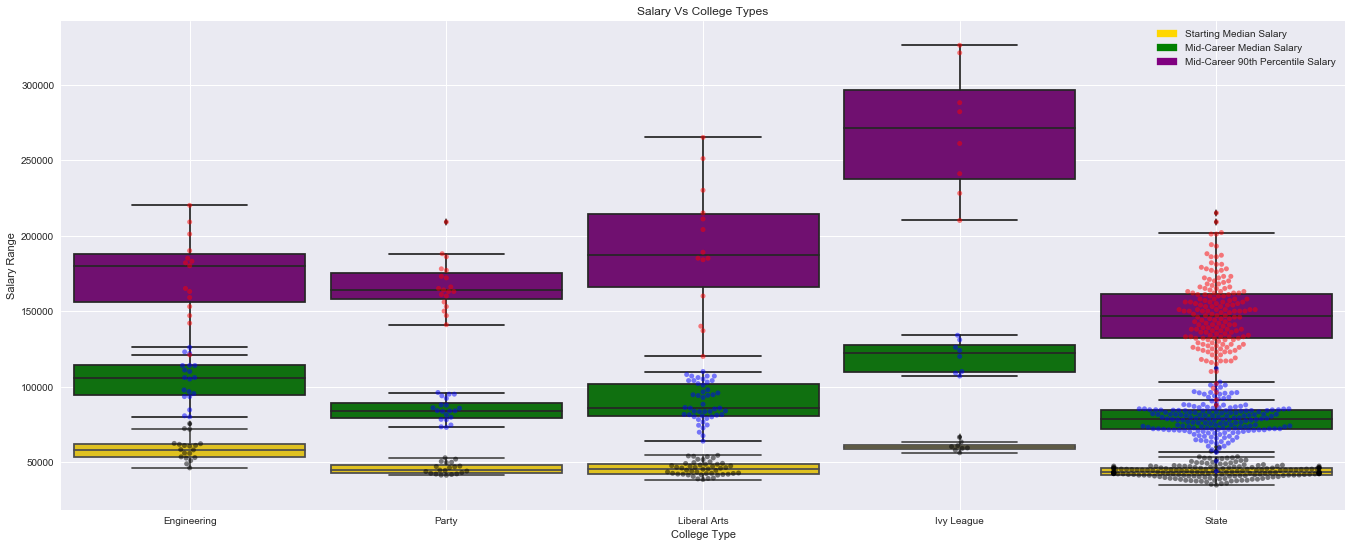

In [24]:
#BoxPlot Salary Vs College Type shows distribution of salary for different School Types 
#Data obtained for 270 Colleges

sn_plot_college_type = sns.boxplot(x="School Type", y="Starting Median Salary", width=0.9, data=salary_by_inst, color="gold")
sn_plot_college_type = sns.boxplot(x="School Type", y="Mid-Career Median Salary", width=0.9, data=salary_by_inst, color="green")
sn_plot_college_type = sns.boxplot(x="School Type", y="Mid-Career 90th Percentile Salary", width=0.9, data=salary_by_inst, color="purple")
sn_plot_collge = sns.swarmplot(x="School Type", y="Starting Median Salary", data=salary_by_inst, color="black", alpha=0.5)
sn_plot_collge = sns.swarmplot(x="School Type", y="Mid-Career Median Salary", data=salary_by_inst, color="blue", alpha=0.5)
sn_plot_collge = sns.swarmplot(x="School Type", y="Mid-Career 90th Percentile Salary", data=salary_by_inst, color="red", alpha=0.5)
sns.set(rc={'figure.figsize':(18,16)})

#Add Legend
legend_dict = { 'Starting Median Salary' : 'gold', 'Mid-Career Median Salary' : 'green', 'Mid-Career 90th Percentile Salary' : 'purple' }
patchList=[]
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)

# Incorporate the other graph properties

plt.title("Salary Vs College Types")
plt.ylabel("Salary Range")
plt.xlabel("College Type")
plt.grid(True)
plt.savefig('Salary_Range_vs_College.png')
plt.show()


In [25]:
#Create Dataframe for Salary by Region
salary_by_region = pd.read_csv('data/salaries-by-region.csv')
salary_by_region.head()


,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [26]:
#Changing the string value to numeric

salary_list = ['Starting Median Salary', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary',
              'Mid-Career 25th Percentile Salary','Mid-Career 75th Percentile Salary','Mid-Career 90th Percentile Salary']
for x in salary_list:
    salary_by_region[x] = salary_by_region[x].str.replace("$","")
    salary_by_region[x] = salary_by_region[x].str.replace(",","")
    salary_by_region[x] = pd.to_numeric(salary_by_region[x])

salary_by_region.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN


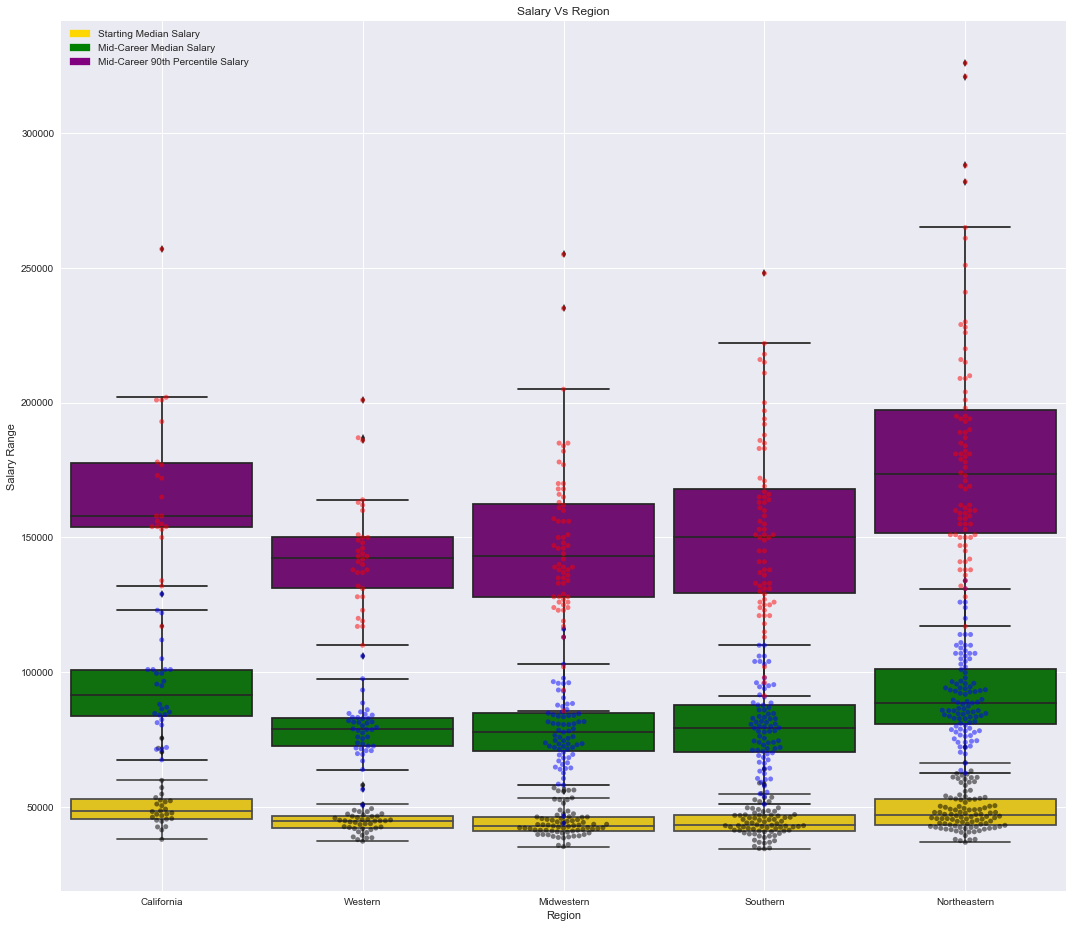

In [27]:
#BoxPlot Salary Vs College Type shows distribution of salary for different School Types for 
#Data obtained for 270 Colleges

sn_plot_college_type = sns.boxplot(x="Region", y="Starting Median Salary", width=0.9, data=salary_by_region, color="gold")
sn_plot_college_type = sns.boxplot(x="Region", y="Mid-Career Median Salary", width=0.9, data=salary_by_region, color="green")
sn_plot_college_type = sns.boxplot(x="Region", y="Mid-Career 90th Percentile Salary", width=0.9, data=salary_by_region, color="purple")
sn_plot_collge = sns.swarmplot(x="Region", y="Starting Median Salary", data=salary_by_region, color="black", alpha=0.5)
sn_plot_collge = sns.swarmplot(x="Region", y="Mid-Career Median Salary", data=salary_by_region, color="blue", alpha=0.5)
sn_plot_collge = sns.swarmplot(x="Region", y="Mid-Career 90th Percentile Salary", data=salary_by_region, color="red", alpha=0.5)
sns.set(rc={'figure.figsize':(18,16)})

#Add Legend
legend_dict = { 'Starting Median Salary' : 'gold', 'Mid-Career Median Salary' : 'green', 'Mid-Career 90th Percentile Salary' : 'purple' }
patchList=[]
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)

# Incorporate the other graph properties

plt.title("Salary Vs Region")
plt.ylabel("Salary Range")
plt.xlabel("Region")
plt.grid(True)
plt.savefig('Salary_Range_vs_Region.png')
plt.show()

In [29]:




#Create a Dataframe for Salary vs Major
major_salary = pd.read_csv('data/degrees-that-pay-back.csv')
major_salary.head()


,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [30]:
#Convert string values to numeric
major_salary['Starting Median Salary']=(major_salary['Starting Median Salary'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))
major_salary['Mid-Career Median Salary']=(major_salary['Mid-Career Median Salary'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))
major_salary['Mid-Career 90th Percentile Salary']=(major_salary['Mid-Career 90th Percentile Salary'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))

major_salary.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,"$42,200.00","$56,100.00","$108,000.00",152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,"$64,300.00","$82,100.00","$127,000.00",161000.0
2,Agriculture,42600.0,71900.0,68.8,"$36,300.00","$52,100.00","$96,300.00",150000.0
3,Anthropology,36800.0,61500.0,67.1,"$33,800.00","$45,500.00","$89,300.00",138000.0
4,Architecture,41600.0,76800.0,84.6,"$50,600.00","$62,200.00","$97,000.00",136000.0


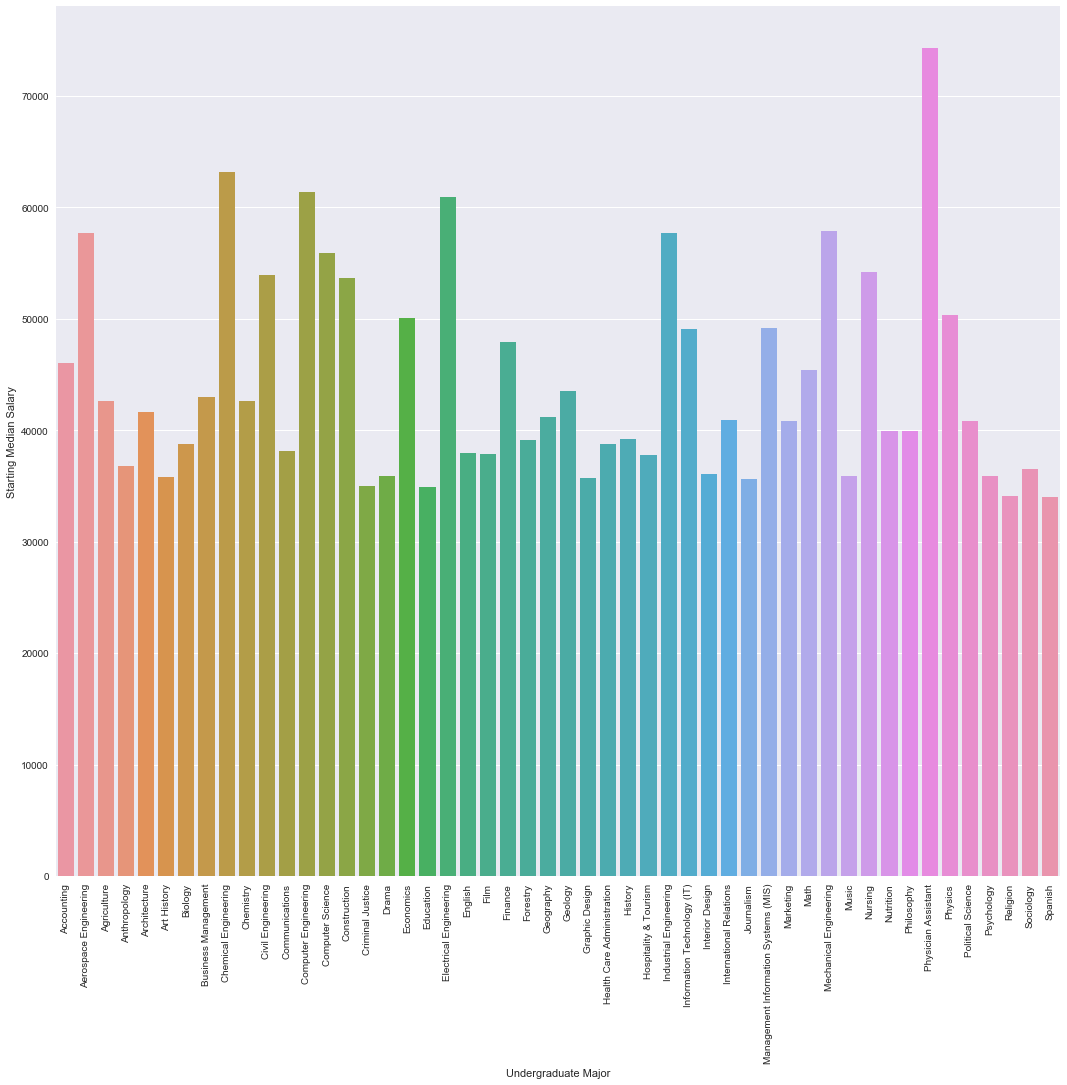

In [31]:




#Major vs Starting Median Salary Bar Plot
sns_major = sns.barplot(x="Undergraduate Major", data=major_salary, y="Starting Median Salary")
sns_major.set_xticklabels(sns_major.get_xticklabels(),rotation=90)
sns.set(rc={'figure.figsize':(20,18)})
plt.savefig('Starting_Median_Salary_vs_Major.png')
plt.show()


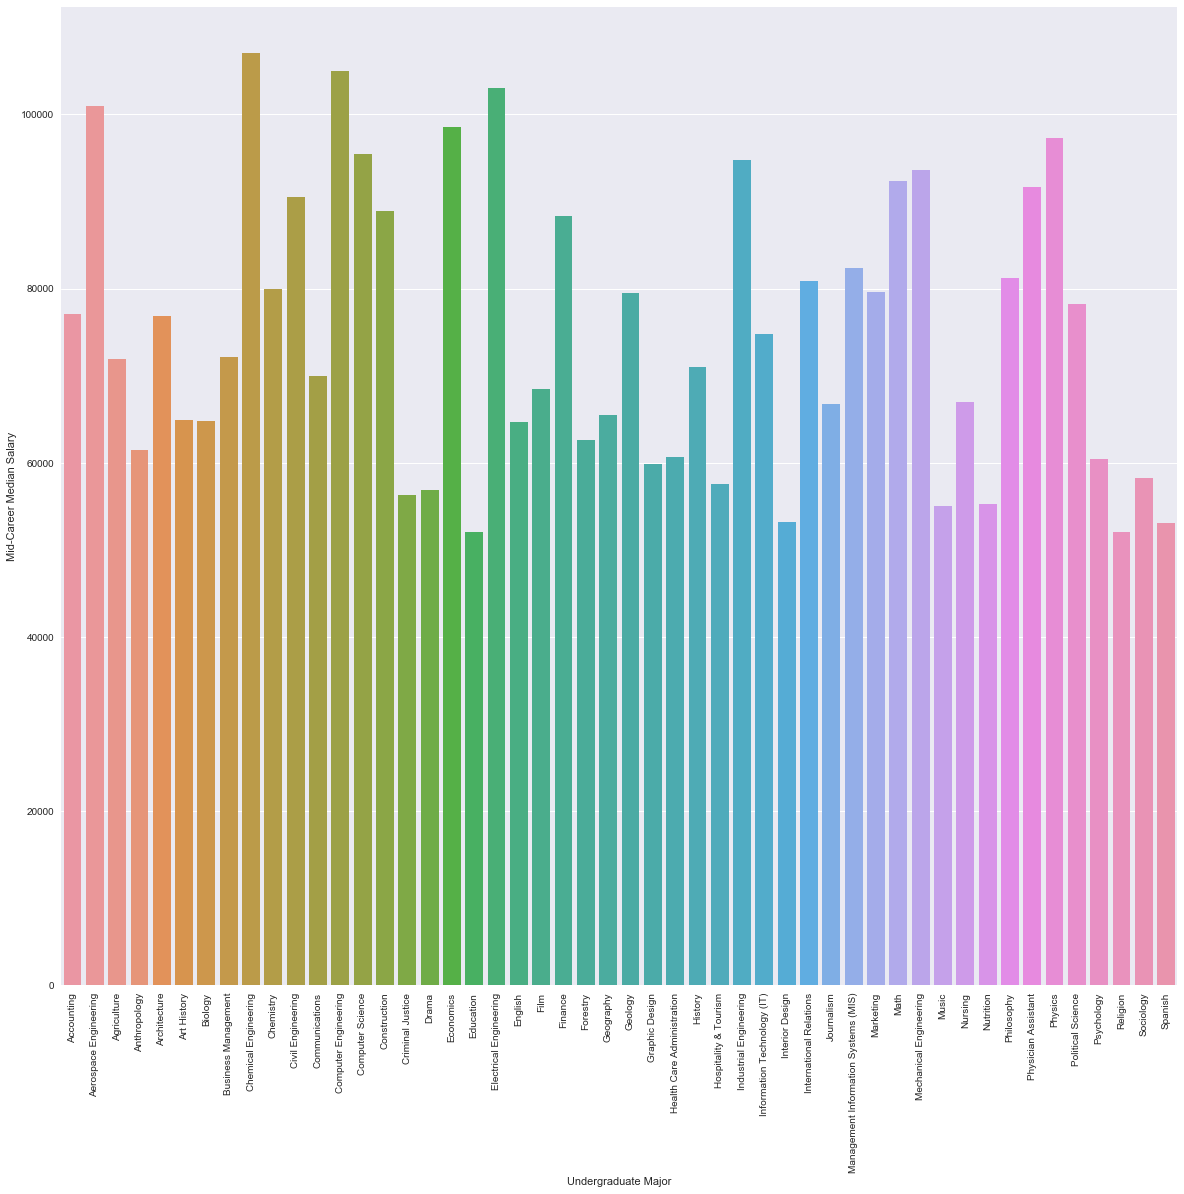

In [32]:




#Major vs Mid-Career 90th Percentile Salary Bar Plot
sns_major = sns.barplot(x="Undergraduate Major", data=major_salary, y="Mid-Career Median Salary")
sns_major.set_xticklabels(sns_major.get_xticklabels(),rotation=90)
sns.set(rc={'figure.figsize':(20,18)})
plt.savefig('Mid-Career_Median_Salary_vs_Major.png')
plt.show()


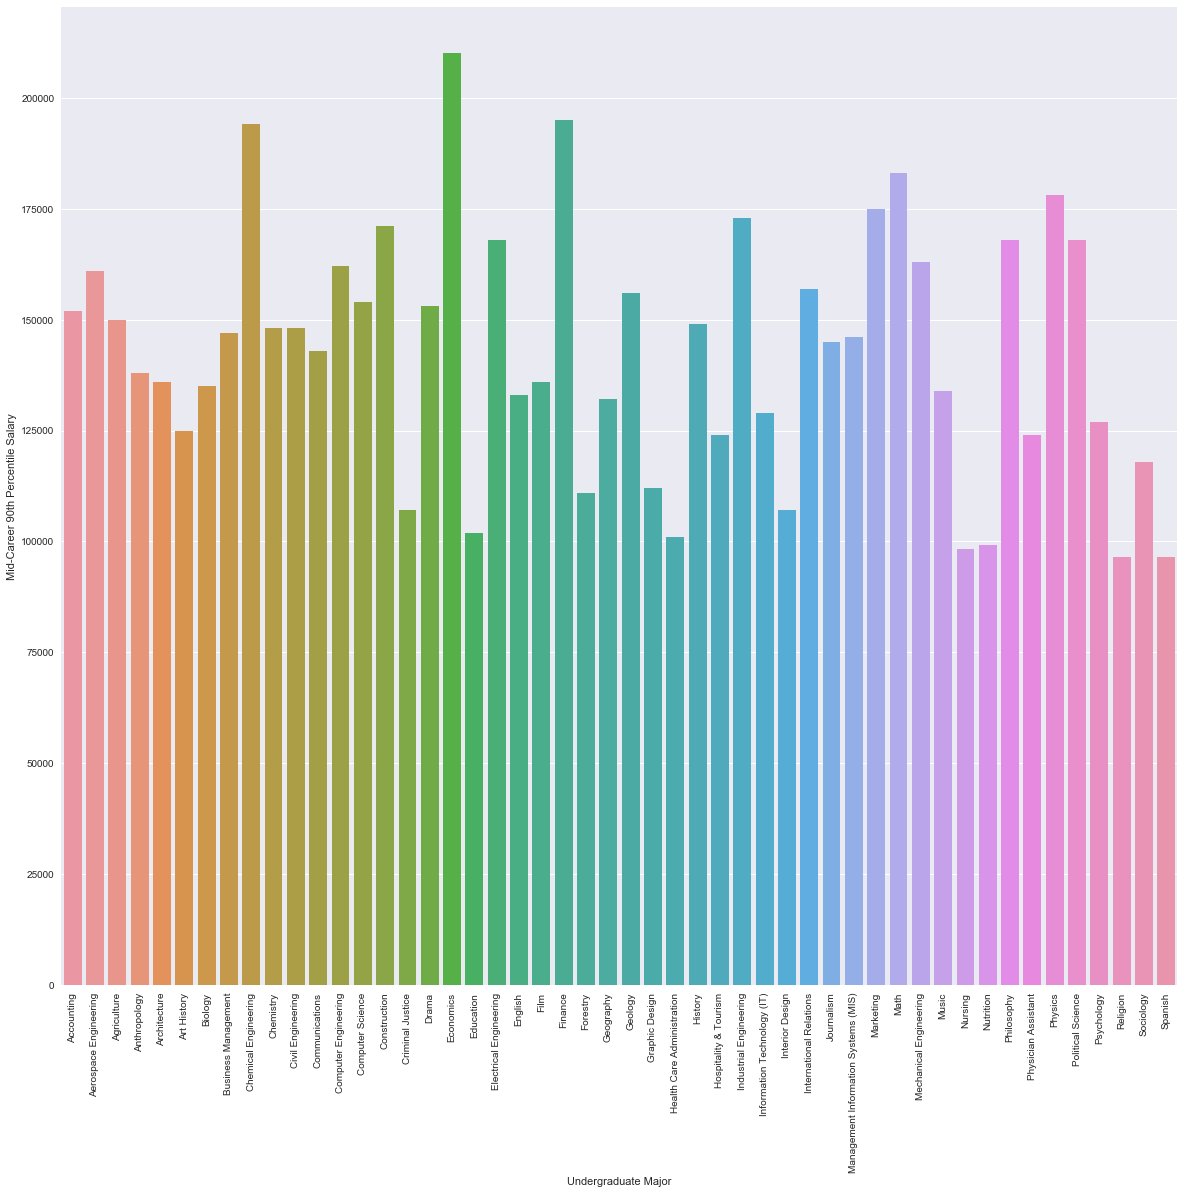

In [33]:
#Major vs Mid-Career Median Salary Bar Plot
sns_major = sns.barplot(x="Undergraduate Major", data=major_salary, y="Mid-Career 90th Percentile Salary")
sns_major.set_xticklabels(sns_major.get_xticklabels(),rotation=90)
sns.set(rc={'figure.figsize':(20,18)})
plt.savefig('Mid-Career_90th_Percentile_Salary_vs_Major.png')
plt.show()

In [34]:
#Merge Cost and Salary Dataframe

cost_df = pd.read_csv('data/FY16_College_Data.csv')
salary_df = pd.read_csv('data/salaries-by-college-type.csv')
salary_df['INSTNM'] = salary_df['School Name']
salary_df['INSTNM'] = salary_df['INSTNM'].str.replace(r"\s\(.*\)","")
salary_df['INSTNM'] = salary_df['INSTNM'].str.replace(",","")
cost_df['INSTNM'] = cost_df['INSTNM'].str.replace("-"," ")
salary_df['INSTNM'] = salary_df['INSTNM'].str.replace("-"," ")
cost_df['INSTNM'] = cost_df['INSTNM'].str.replace(",","")
salary_df['INSTNM'] = salary_df['INSTNM'].str.replace(" ","")
cost_df['INSTNM'] = cost_df['INSTNM'].str.replace(" ","")
salary_df['INSTNM'] = salary_df['INSTNM'].str.upper()
cost_df['INSTNM'] = cost_df['INSTNM'].str.upper()
merged_df = pd.merge(cost_df, salary_df, on='INSTNM', how='inner')
merged_df.to_csv('data/Salary_Cost.csv')

In [35]:




#changing the string value to numeric

salary_list = ['Starting Median Salary', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary',
             'Mid-Career 25th Percentile Salary','Mid-Career 75th Percentile Salary','Mid-Career 90th Percentile Salary']
for x in salary_list:
   merged_df[x] = merged_df[x].str.replace("$","")
   merged_df[x] = merged_df[x].str.replace(",","")
   merged_df[x] = pd.to_numeric(merged_df[x])

merged_df.head()


,Unnamed: 0,UNITID,INSTNM,CITY,STABBR,REGION,LATITUDE,LONGITUDE,PREDDEG,COSTT4_A,...,SAT_AVG,ACTCMMID,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,1,100663,UNIVERSITYOFALABAMAATBIRMINGHAM,Birmingham,AL,5,33.502230,-86.809170,3,22232.0,...,1147.0,25.0,University of Alabama at Birmingham (UAB),State,39200.0,70100.0,43000.0,53400.0,91400.0,125000.0
1,9,100858,AUBURNUNIVERSITY,Auburn,AL,5,32.604685,-85.482782,3,29164.0,...,1218.0,27.0,Auburn University,State,45400.0,84700.0,45400.0,62700.0,109000.0,145000.0
2,60,102553,UNIVERSITYOFALASKAANCHORAGE,Anchorage,AK,8,61.189554,-149.826135,3,14476.0,...,NaN,NaN,"University of Alaska, Anchorage",State,45900.0,72600.0,39800.0,56600.0,99300.0,137000.0
3,81,104179,UNIVERSITYOFARIZONA,Tucson,AZ,6,32.232071,-110.950769,3,23996.0,...,NaN,NaN,University of Arizona,State,47500.0,86100.0,44800.0,61700.0,117000.0,160000.0
4,134,106397,UNIVERSITYOFARKANSAS,Fayetteville,AR,5,36.061530,-94.178214,3,21288.0,...,1154.0,26.0,University of Arkansas,State,44100.0,82800.0,43200.0,60700.0,113000.0,160000.0


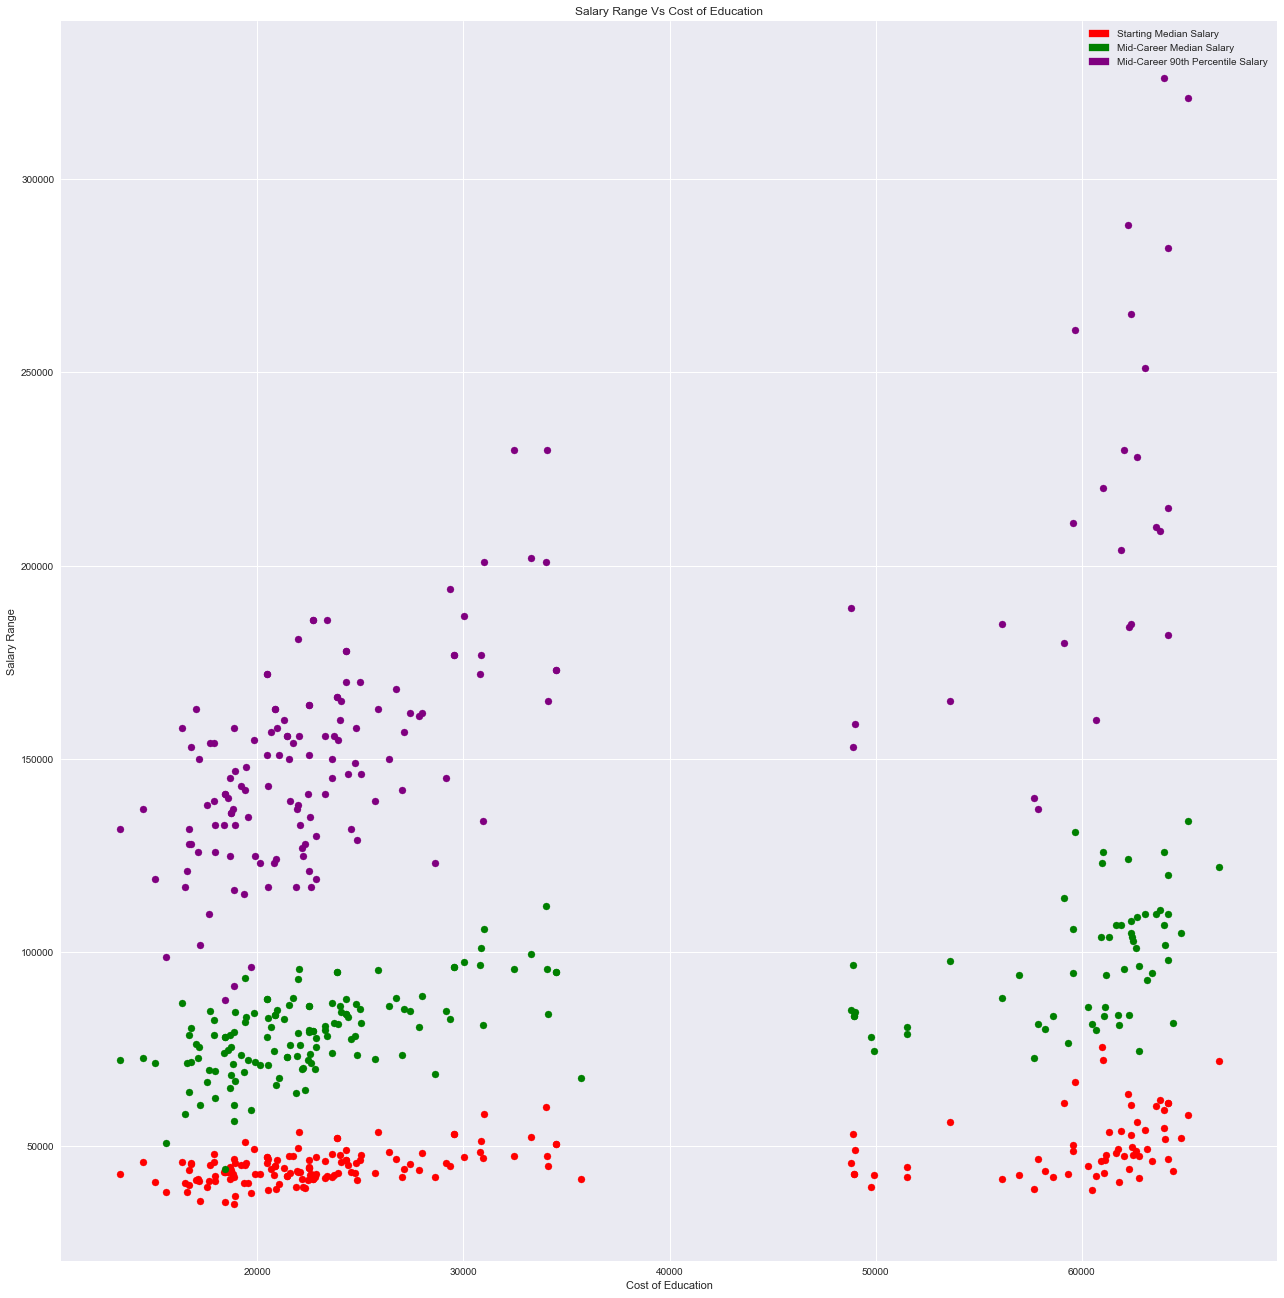

In [36]:
#Scatter Plot for ROI - Range of Salary vs Cost of Education.
#The Range of Salary is from Starting Median Average, Mid-Career Average and Mid-Career 90th Percentile
#The Merged dataframe shows salary and cost for 195 colleges

ROI = sns.FacetGrid(merged_df, size=18)
ROI.map(plt.scatter, 'COSTT4_A', 'Starting Median Salary', color="red",)
ROI.map(plt.scatter, 'COSTT4_A', 'Mid-Career Median Salary', color="green")
ROI.map(plt.scatter, 'COSTT4_A', 'Mid-Career 90th Percentile Salary', color="purple")

sns.set(rc={'figure.figsize':(18,16)})

#Add Legend
legend_dict = { 'Starting Median Salary' : 'red', 'Mid-Career Median Salary' : 'green', 'Mid-Career 90th Percentile Salary' : 'purple' }
patchList=[]
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)

# Incorporate the other graph properties
plt.title("Salary Range Vs Cost of Education")
plt.ylabel("Salary Range")
plt.xlabel("Cost of Education")
plt.grid(True)
plt.savefig('Salary_Range_vs_CostOfEducation.png')
plt.show()
